# Convolution Neural Network for recognizing digits from the MNIST Database

In [60]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras import datasets, callbacks

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#load mnist digits data
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
#normalize pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
#reshape images to 4 dim
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

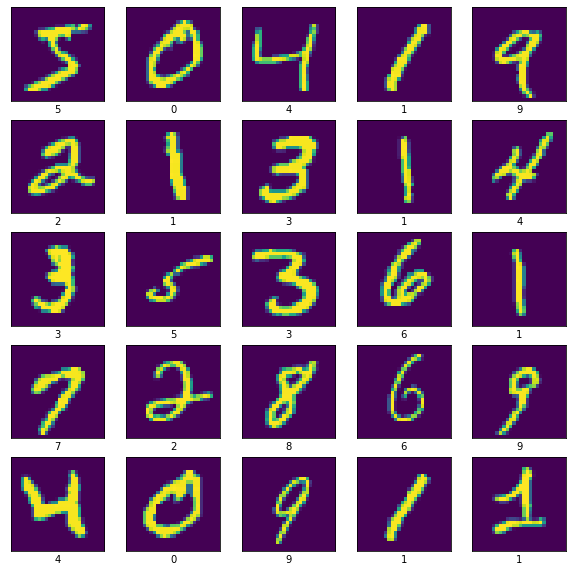

In [5]:
#plot images of digits dataset
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [17]:
#define convolutional neural network function
def mnist_cnn():
    
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [18]:
#create model
mnist_model = mnist_cnn()
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)        

In [19]:
#compile model
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

mnist_model.compile(optimizer='adam', 
              loss='SparseCategoricalCrossentropy', 
              metrics=['accuracy'])

history = mnist_model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 39s 17ms/step - loss: 0.7333 - accuracy: 0.7484 - val_loss: 0.0632 - val_accuracy: 0.9801
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1370 - accuracy: 0.9578 - val_loss: 0.0471 - val_accuracy: 0.9860
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1043 - accuracy: 0.9686 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 4/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0870 - accuracy: 0.9741 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0744 - accuracy: 0.9767 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 6/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0738 - accuracy: 0.9791 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 7/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.0304 -

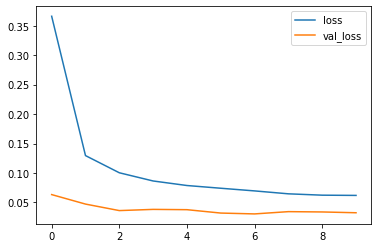

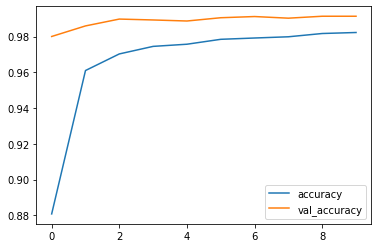

In [20]:
#evaluate model
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [21]:
#predition on test data
prediction = mnist_model.predict(X_test)

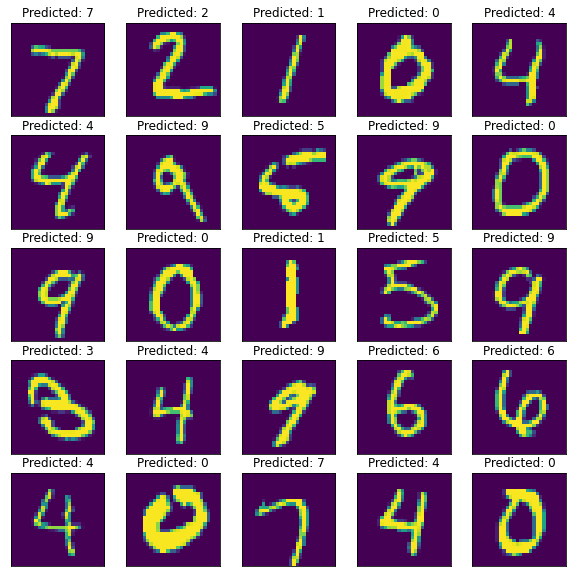

In [49]:
#plot predictions with images
fig, ax = plt.subplots(5, 5, figsize = (10, 10))
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_test[rows*i + j])
        ax[i][j].set_title("Predicted: "+str(list(prediction[rows*i + j]).index(max(list(prediction[rows*i + j])))))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
plt.show()

In [77]:
#evaluate accuracy
final_pred = list(map(lambda x: list(x).index(np.max(x)), prediction))
conf_matrix = pd.DataFrame(confusion_matrix(y_test, final_pred), columns = range(10))

print('Accuracy Score: ' + str(accuracy_score(y_test, final_pred)) + '\n')
print(classification_report(y_test, final_pred))
conf_matrix

Accuracy Score: 0.9923

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



,0,1,2,3,4,5,6,7,8,9
0,978,0,1,0,0,0,0,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,1,2,1024,1,0,0,0,3,1,0
3,0,1,0,1006,0,0,0,1,2,0
4,0,0,0,0,966,0,0,0,0,16
5,1,0,0,6,0,881,1,0,1,2
6,7,2,0,0,0,0,948,0,1,0
7,0,4,2,0,0,0,0,1021,1,0
8,3,1,0,0,0,0,0,0,967,3
9,0,0,0,0,4,1,0,5,1,998
